<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week4_Day3_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Import and Cleaning:

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='ISO-8859-1')
print(df.head())

# For numerical columns, fill with the mean
df['Fatalities'].fillna(df['Fatalities'].mean(), inplace=True)

# For categorical columns, fill with a placeholder
df['Location'].fillna('Unknown', inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any conversion issues
print(df['Date'].isnull().sum())

        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

<ipython-input-4-a65885ec9113>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fatalities'].fillna(df['Fatalities'].mean(), inplace=True)
<ipython-input-4-a65885ec9113>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

2. Exploratory Data Analysis:

In [5]:
# Total number of crashes
total_crashes = len(df)
print("Total number of crashes are :", total_crashes)

# Total number of fatalities
total_fatalities = df['Fatalities'].sum()
print("Total number of fatalities are :", total_fatalities)

# Total aboard (passengers + crew)
if 'Aboard' in df.columns:
    total_aboard = df['Aboard'].sum()
    survival_rate = (total_aboard - total_fatalities) / total_aboard
    print("Total aboard:", total_aboard)
    print(f"Survival rate: {survival_rate:.2%}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4998 non-null   datetime64[ns]
 1   Time                   3486 non-null   object        
 2   Location               4998 non-null   object        
 3   Operator               4988 non-null   object        
 4   Flight #               1329 non-null   object        
 5   Route                  4221 non-null   object        
 6   AC Type                4983 non-null   object        
 7   Registration           4724 non-null   object        
 8   cn/ln                  4330 non-null   object        
 9   Aboard                 4980 non-null   float64       
 10  Aboard Passangers      4769 non-null   float64       
 11  Aboard Crew            4772 non-null   float64       
 12  Fatalities             4998 non-null   float64       
 13  Fat

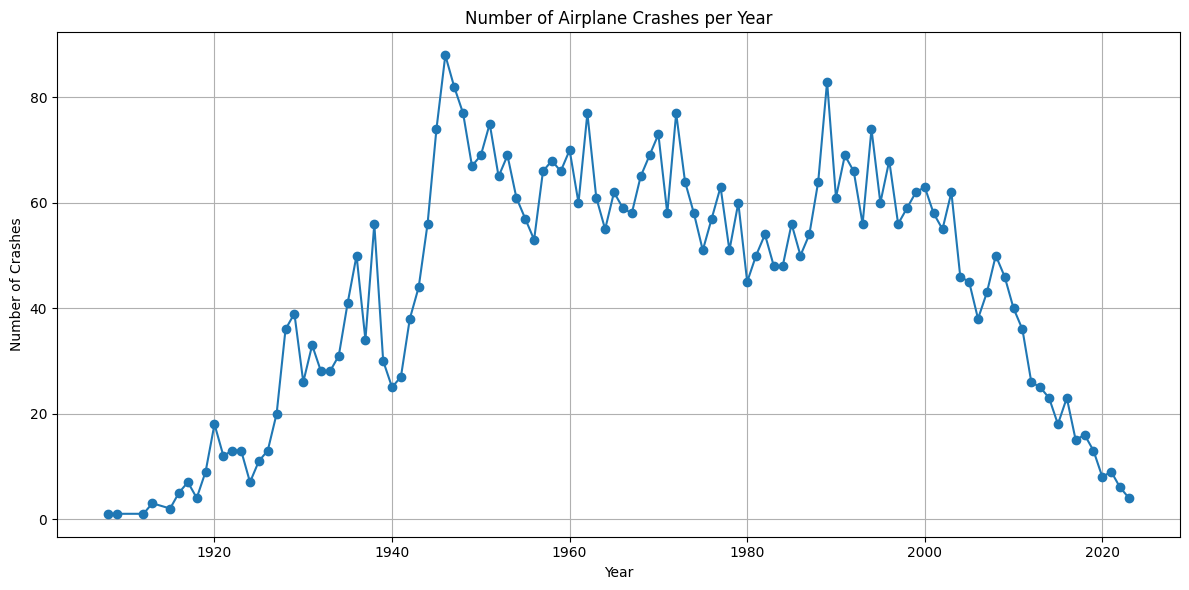

In [6]:
# Create a 'Year' column
df['Year'] = df['Date'].dt.year

# Count crashes per year
crashes_per_year = df['Year'].value_counts().sort_index()

# Plotting the number of crashes per year
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crashes_per_year.plot(kind='line', marker='o')
plt.title("Number of Airplane Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.tight_layout()
plt.show()


Statistical Analysis:

In [7]:
import numpy as np
from scipy import stats
import pandas as pd


In [8]:
# Assuming df is your cleaned DataFrame with columns 'Fatalities' and 'Aboard'

# Calculate survival rates per crash
df['Survival_Rate'] = (df['Aboard'] - df['Fatalities']) / df['Aboard']

# Key statistics for Fatalities
mean_fatalities = np.mean(df['Fatalities'])
median_fatalities = np.median(df['Fatalities'])
std_fatalities = np.std(df['Fatalities'], ddof=1)

print("Fatalities - Mean:", mean_fatalities)
print("Fatalities - Median:", median_fatalities)
print("Fatalities - Std Dev:", std_fatalities)

# Key statistics for Survival Rate
mean_survival = np.mean(df['Survival_Rate'])
median_survival = np.median(df['Survival_Rate'])
std_survival = np.std(df['Survival_Rate'], ddof=1)

print("Survival Rate - Mean:", mean_survival)
print("Survival Rate - Median:", median_survival)
print("Survival Rate - Std Dev:", std_survival)


Fatalities - Mean: 22.37354709418838
Fatalities - Median: 11.0
Fatalities - Std Dev: 35.03366318524215
Survival Rate - Mean: 0.181489019431307
Survival Rate - Median: nan
Survival Rate - Std Dev: 0.3117242492487997


In [9]:
# Create decade column
df['Decade'] = (df['Year'] // 10) * 10

# Select two decades for comparison, e.g., 1970s and 2000s
fatalities_70s = df[df['Decade'] == 1970]['Fatalities']
fatalities_2000s = df[df['Decade'] == 2000]['Fatalities']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(fatalities_70s.dropna(), fatalities_2000s.dropna(), equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Significant difference in average fatalities between the 1970s and 2000s.")
else:
    print("No significant difference in average fatalities between these decades.")


T-statistic: 3.9853719977880306
P-value: 7.175237091088752e-05
Significant difference in average fatalities between the 1970s and 2000s.


4. Visualization



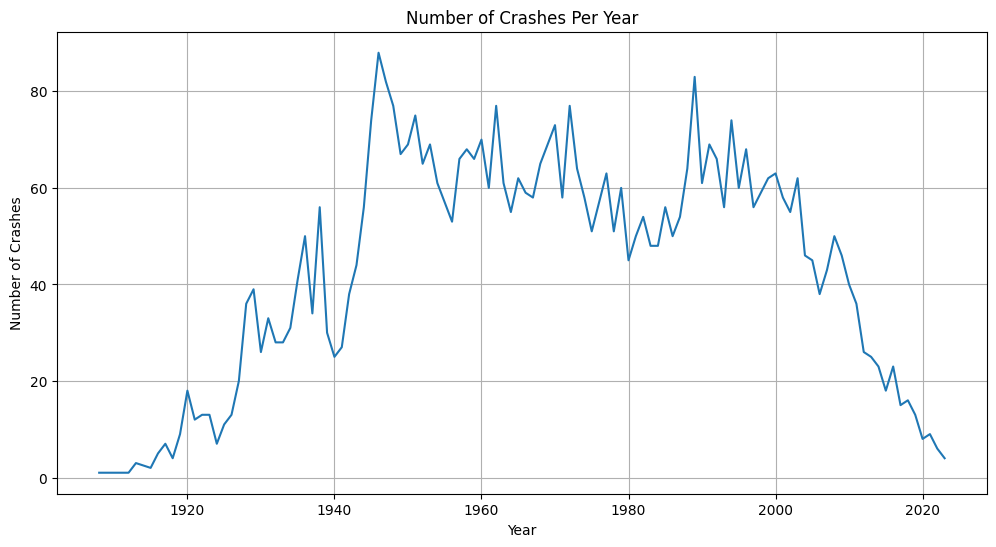

<ipython-input-11-ba667f200904>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette='viridis')


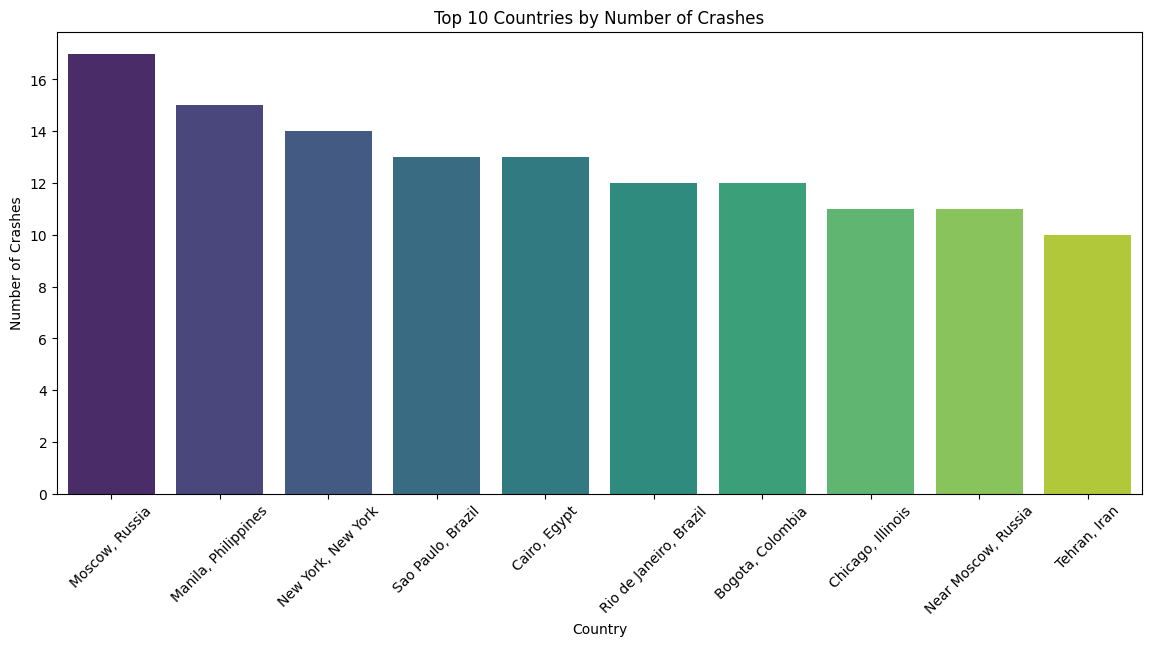

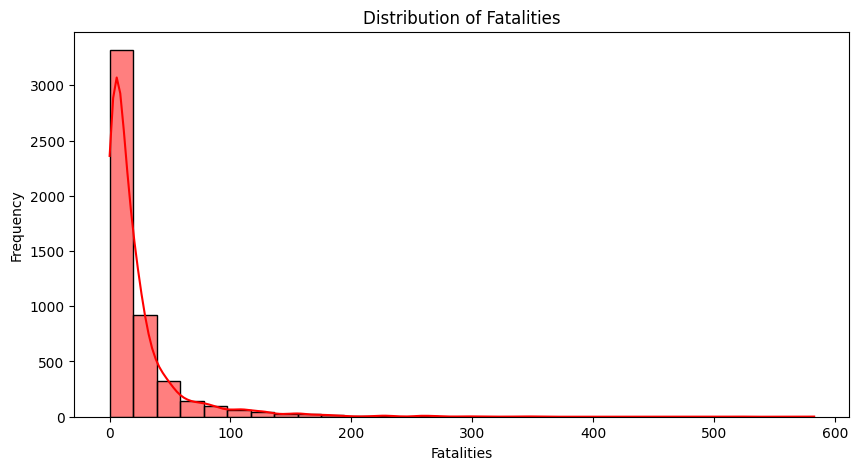

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot - crashes over years
plt.figure(figsize=(12,6))
df['Year'].value_counts().sort_index().plot()
plt.title("Number of Crashes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()

# Bar chart - crashes by region (assuming 'Location' or 'Country' column exists)
plt.figure(figsize=(14,6))
top_regions = df['Location'].value_counts().head(10)
sns.barplot(x=top_regions.index, y=top_regions.values, palette='viridis')
plt.title("Top 10 Countries by Number of Crashes")
plt.xlabel("Country")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.show()

# Histogram - fatalities distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Fatalities'], bins=30, kde=True, color='red')
plt.title("Distribution of Fatalities")
plt.xlabel("Fatalities")
plt.ylabel("Frequency")
plt.show()


5. Insight and Report

- Trend over years: Number of crashes generally decreased/increased over decades (visualize and interpret).

- Regional hotspots: Certain countries have higher crash counts — could be due to flight volume, reporting, or safety.

- Fatalities distribution: Most crashes have low fatalities, but some catastrophic events skew the mean.

- Decadal comparison: Hypothesis test may show a significant difference in average fatalities indicating improvement (or worsening) over time.